<a href="https://colab.research.google.com/github/alexk22-dev/salifort-motors/blob/main/Salifort_Motors_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Capstone Project**#

# **PACE Stages**


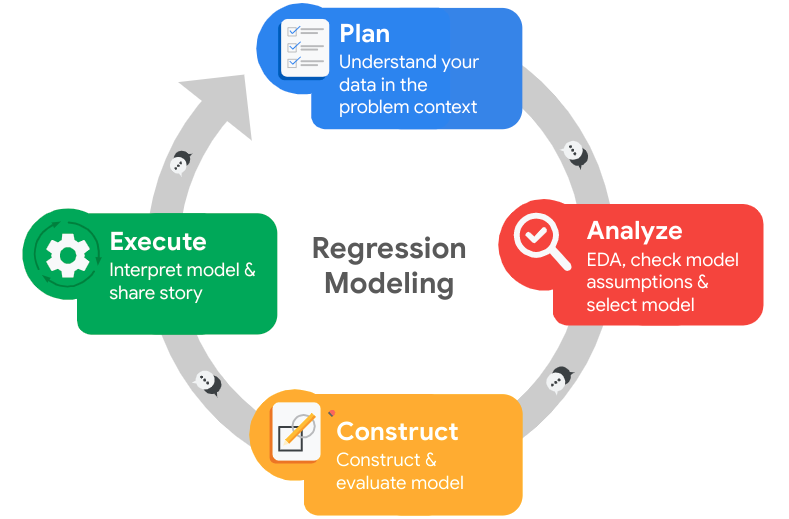

## **Pace: Plan**

### Business Scenario

**Goals of this Capstone Project:**

> **1.** Analyze the data collected by the Salifort Motors HR department

> **2.** Build a model that predicts whether or not an employee will leave the company

> **3.** Identify factors that contribute to their leaving

### HR Dataset

The dataset used in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** Dataset source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)


### Ethical Considerations

**Note**: All employees in this project and dataset are **fictional**. No identification with actual persons (living or deceased), places, buildings, and products is intended or should be inferred.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import Packages

In [ ]:
# Import packages

# Data manipulation

import pandas as pd
import numpy as np

# Data visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Displaying all of the columns in dataframes

pd.set_option('display.max_columns', None)

# Data modeling

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and helper functions

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Saving models

import pickle

### Load Dataset

In [ ]:
# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe

df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather Basic Information

In [ ]:
# Basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather Descriptive Statistics

In [ ]:
# Descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename Columns

In [ ]:
# Display all column names

sorted(list(df0.columns))

['Department',
 'Work_accident',
 'average_montly_hours',
 'last_evaluation',
 'left',
 'number_project',
 'promotion_last_5years',
 'salary',
 'satisfaction_level',
 'time_spend_company']

In [ ]:
# Rename columns

df0.columns = ['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'tenure',
 'work_accident',
 'left',
 'promotion_last_5_years',
 'department',
 'salary']

# Display all column names after the update

sorted(list(df0.columns))

['average_monthly_hours',
 'department',
 'last_evaluation',
 'left',
 'number_project',
 'promotion_last_5_years',
 'salary',
 'satisfaction_level',
 'tenure',
 'work_accident']

### Check missing values

In [ ]:
# Check for missing values

df0.isna().sum()

# No missing values found

satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
tenure                    0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check Duplicates

In [ ]:
# Check for duplicates

print('Number of duplicated entries in the dataframe: ' + df0.duplicated().sum().astype(str))

Number of duplicated entries in the dataframe: 3008


In [ ]:
# Inspect some rows containing duplicates

df0[df0.duplicated()].sort_values(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary']).head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
12278,0.09,0.78,6,254,4,0,1,0,support,low
14489,0.09,0.78,6,254,4,0,1,0,support,low
12477,0.09,0.79,6,275,4,0,1,0,sales,low
14688,0.09,0.79,6,275,4,0,1,0,sales,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable

df = df0.drop_duplicates()

# Display first few rows of new dataframe

df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Check for duplicates in the new dataframe

print('Number of duplicates in the new dataframe: ' + df.duplicated().sum().astype(str))

Number of duplicates in the new dataframe: 0


### Check Outliers

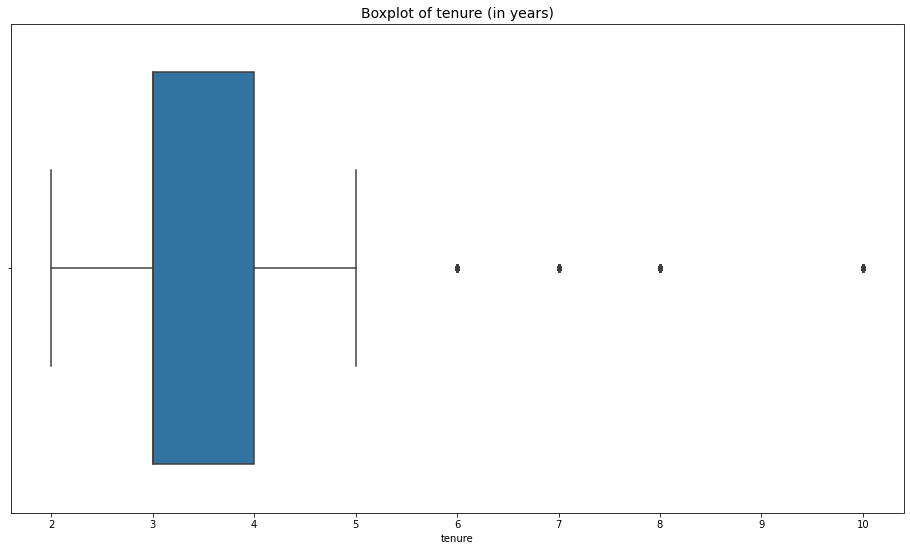

In [ ]:
# Boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize = (16, 9))
plt.title('Boxplot of tenure (in years)', fontsize=14)

sns.boxplot(data = df, x = 'tenure')

plt.show()

In [ ]:
# Number of rows containing outliers

Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)

IQR = Q3 - Q1

upper_limit = 1.5 * IQR + Q3
lower_limit = Q1 - 1.5 * IQR

print('Number of outliers in \'tenure\' column: ' + df.loc[(df['tenure'] > 1.5 * IQR + Q3), 'tenure'].count().astype(str))

Number of outliers in 'tenure' column: 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)



In [ ]:
# Numbers of people who left vs. stayed

print('Number of people who left: ' + df.loc[(df['left'] == 1), 'left'].count().astype(str))
print('Number of people who stayed: ' + df.loc[(df['left'] == 0), 'left'].count().astype(str))

print('')
# Percentages of people who left vs. stayed

print('Percentage of people who left: ' + round((df.loc[(df['left'] == 1), 'left'].count() / df.loc[(df['left']), 'left'].count() * 100), 2).astype(str) + '%')
print('Percentage of people who stayed: ' + round((df.loc[(df['left'] == 0), 'left'].count() / df.loc[(df['left']), 'left'].count() * 100), 2).astype(str) + '%')

Number of people who left: 1991
Number of people who stayed: 10000

Percentage of people who left: 16.6%
Percentage of people who stayed: 83.4%


### Data Visualizations

**Plot 1.** The following stacked boxplot displays a comparison of distributions of `average_monthly_hours` by `number_project`, separating the distributions by those who stayed vs. those who left.

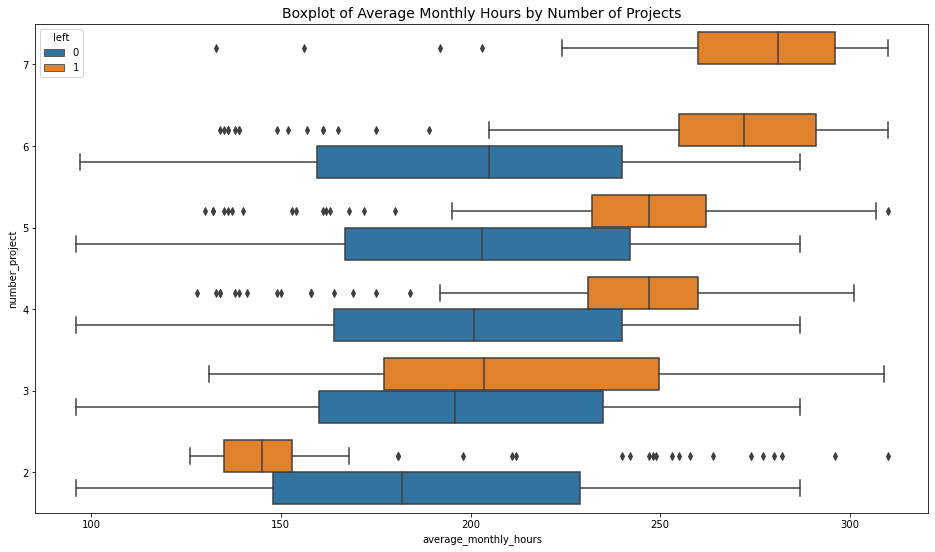

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Boxplot of Average Monthly Hours by Number of Projects', fontsize = 14)

sns.boxplot(data = df, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h')
plt.gca().invert_yaxis()

plt.show()

**Plot 2.** The following histogram provides context for the previous boxplot by displaying the represented sample sizes of each group (stayed vs. left).

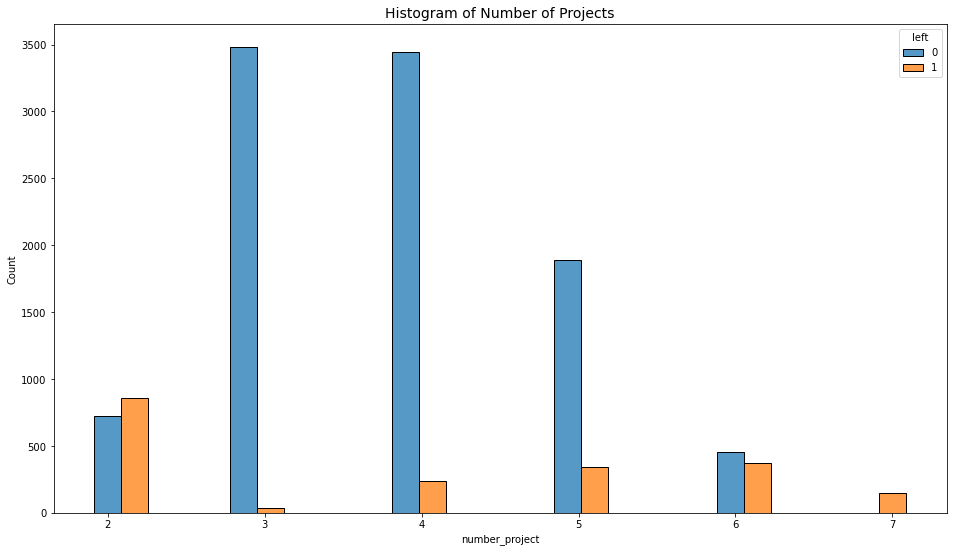

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Histogram of Number of Projects', fontsize = '14')

sns.histplot(data = df, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 2)

plt.show()

**Conclusions from Plots 1 and 2**: One trend that may be considered natural shown in the plots is that the mean monthly hours for both groups (stayed and left) increased as the number of projects increased.

Other observations were made:

> **1.** Two groups of employees left the company: (A) those who worked considerably less than their colleagues even with the same number of projects, and (B) those who worked considerably more. Those in Group A were likely fired due to underperformance. Those in Group B likely quit due to overworking.

> **2.** All employees with 7 projects left. These employees as well as employees from the 6-project group had interquartile ranges for mean monthly hours between 255-295 hours per month. Most likely, these employees fell into Group B, as outlined in Observation 1.

> **3.** The optimal number of projects for employees appears to be 3 projects. This cohort had the smallest left/stay ratio out of all cohorts.

> **4.** Most employees at this company, besides those with only 2 projects, appear to be overworked. Assuming a work week of 40 hours and a work year of 50 weeks, the average working hours per month should be around 166.67 hours. However, every group with more than 2 projects exceeded this monthly working hour average.

**Plot 3.** The following scatterplot displays `satisfaction_level` based on `average_monthly_hours`, separated by those who stayed vs. those who left.

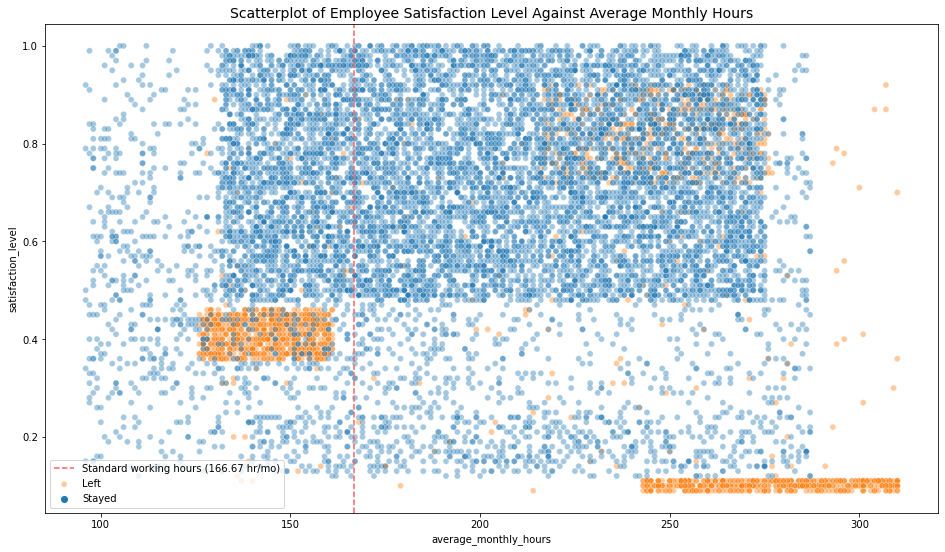

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Scatterplot of Employee Satisfaction Level Against Average Monthly Hours', fontsize = 14)

sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', label = 'Standard working hours', ls = '--')
plt.legend(labels = ['Standard working hours (166.67 hr/mo)', 'Left', 'Stayed'])

plt.show()

Groups **A** and **B** as discussed in previous observations are made obvious in **Plot 3** by the two large clusters of orange dots indicating an employee who left. The large cluster of blue dots from ~130-275 average monthly hours indicates higher satisfaction levels in employees that stayed. The strange distribution of data indicates synthetic data.

**Plot 4.** The following stacked boxplot displays a comparison of distributions of `satisfaction_level` by `tenure`, separating the distributions by those who stayed vs. those who left.

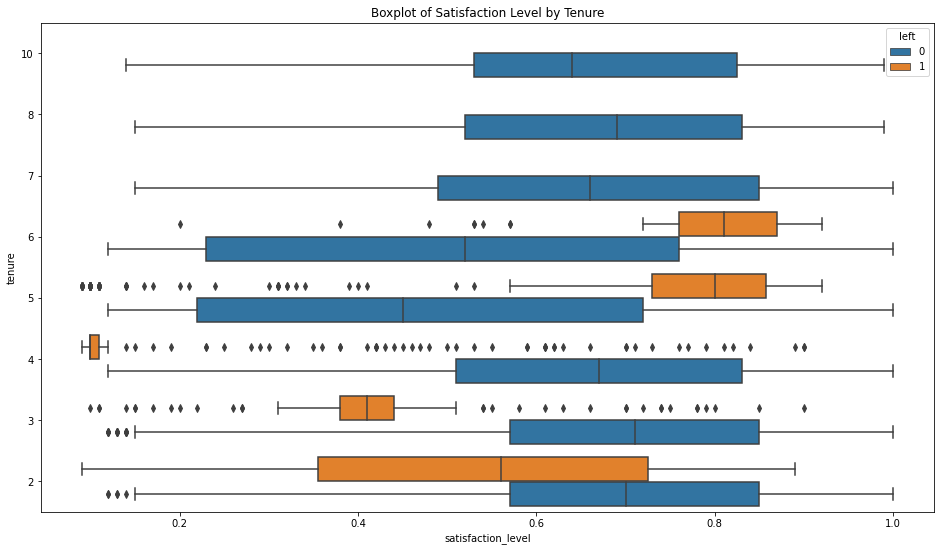

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Boxplot of Satisfaction Level by Tenure')

sns.boxplot(data = df, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h')
plt.gca().invert_yaxis()

plt.show()

**Plot 5.** The following histogram provides context for the previous boxplot by displaying the represented sample sizes of each group (stayed vs. left).

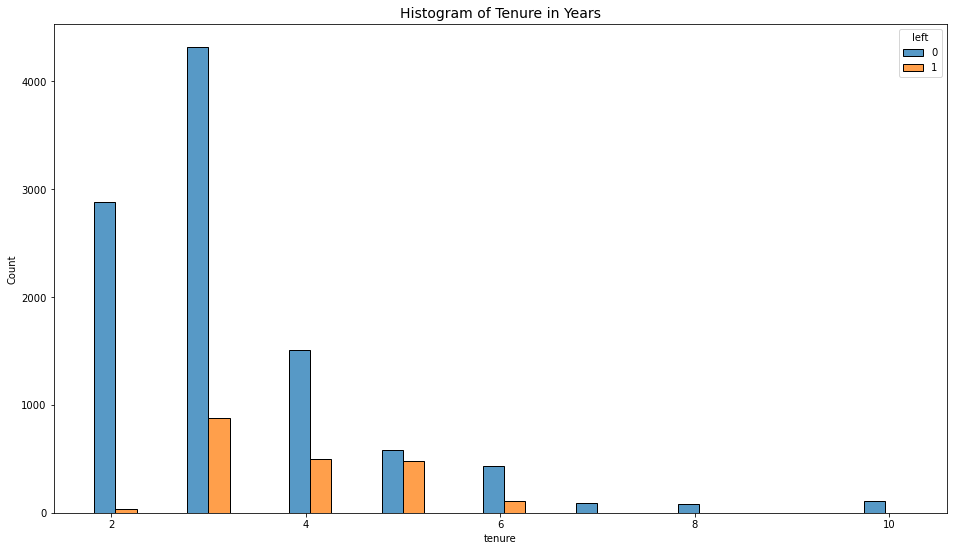

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Histogram of Tenure in Years', fontsize = '14')

sns.histplot(data = df, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 5)

plt.show()

Several observations were made:

> **1.** Employees who left either had low satisfaction levels with shorter tenures or high satisfaction levels with medium-length tenures.

> **2.** Employees who left with 4-year tenures seemed to have extremely low satisfaction levels.

> **3.** Employees with the longest tenures did not leave and appeared to have similar satisfaction levels with newer employees that stayed.

> **4.** There are relatively few employees with long tenures. These may be higher-ranked or higher-paid employees.

**Table 1.** The following table displays the mean and median satisfaction levels of employees who left and employees who stayed.

In [ ]:
# Mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and median satisfaction levels for those who left is lower than those who stayed, as expected. However, the mean satsifaction levels for those who stayed is lower than the median, indicating that the satisfaction level data is skewed left for that group.

**Plot 6.** The following histogram displays salary levels for those with short tenures (tenure < 7 years).

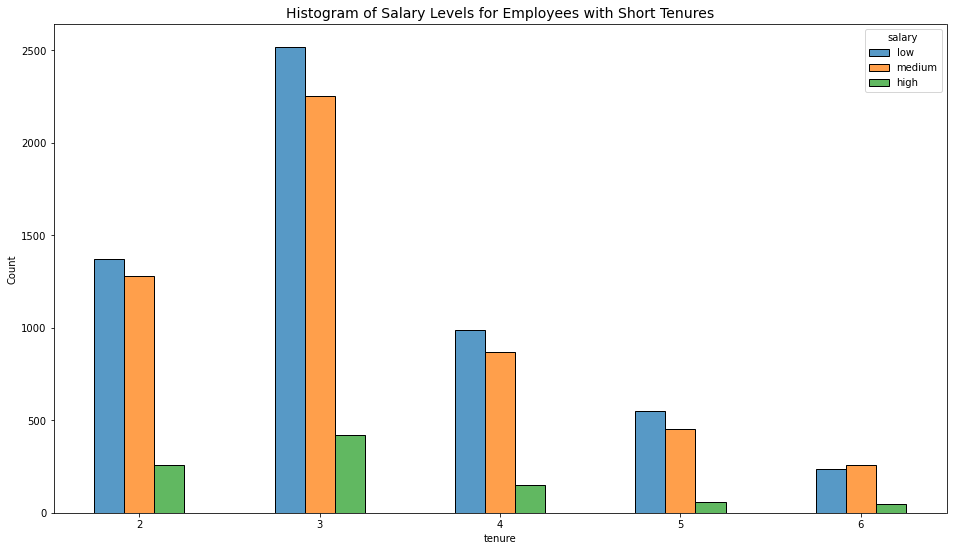

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Histogram of Salary Levels for Employees with Short Tenures', fontsize = '14')

tenure_short = df[df['tenure'] < 7]

sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', discrete = 1, hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = 0.5)

plt.show()

**Plot 7.** The following histogram displays salary levels for those with long tenures (tenure > 6 years).

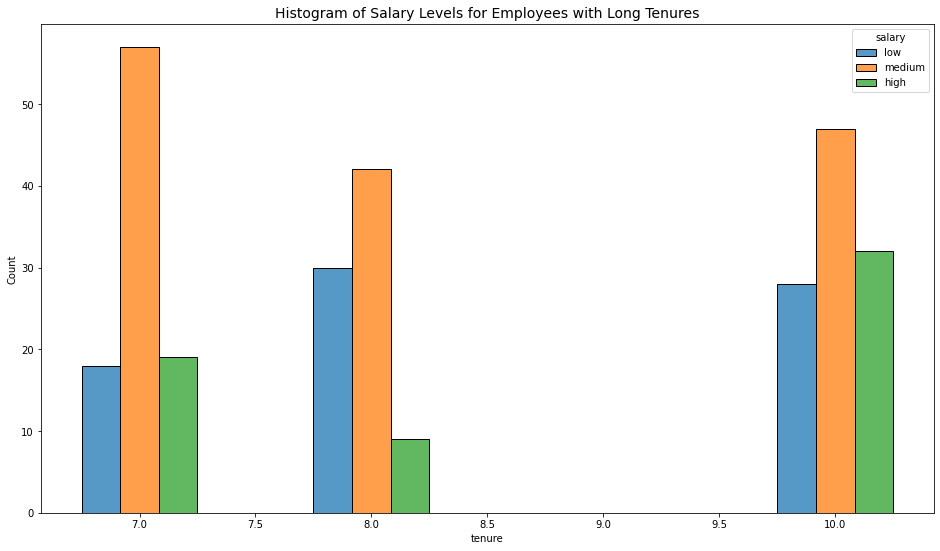

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Histogram of Salary Levels for Employees with Long Tenures', fontsize = '14')

tenure_long = df[df['tenure'] > 6]

sns.histplot(data = tenure_long, x = 'tenure', hue = 'salary', discrete = 1, hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = 0.5)

plt.show()

Interestingly, **Plot 6** and **Plot 7** show that employees with higher tenures were not disproportionately higher paid.

**Plot 8.** The following scatterplot displays `last_evaluation` based on `average_monthly_hours`, separated by those who stayed vs. those who left.

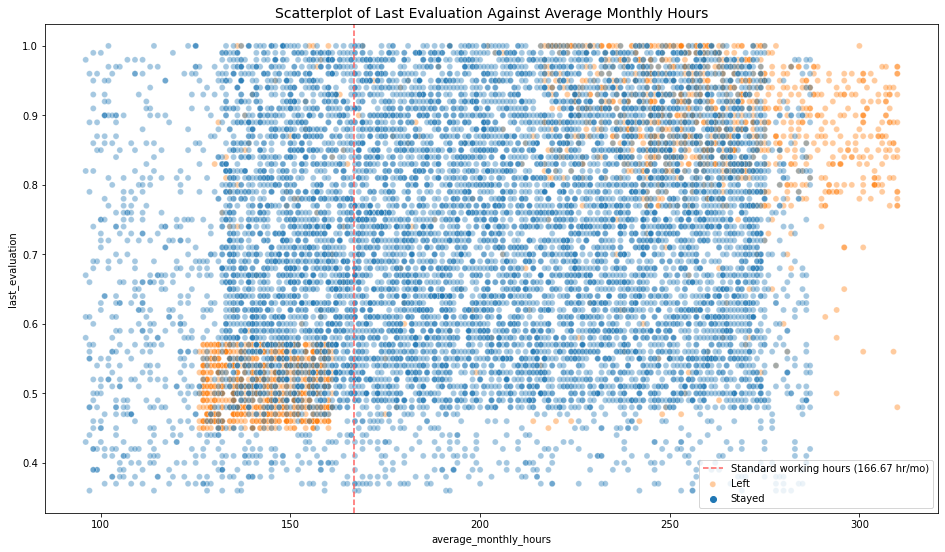

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Scatterplot of Last Evaluation Against Average Monthly Hours', fontsize = 14)

sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', label = 'Standard working hours', ls = '--')
plt.legend(labels = ['Standard working hours (166.67 hr/mo)', 'Left', 'Stayed'])

plt.show()

Several observations were made based off the scatterplot above:

> **1.** The plot above once again shows the existence of Groups A and B as discussed earlier. One group of employees who left seems to be underworking with low evaluation scores, while another group of employees who left seems to be overworking with high evaluation scores.

> **2.** There appears to be a correlation between average monthly hours and evaluation scores.

> **3.** Higher average monthly hours does not appear to guarantee a high evaluation score.

**Plot 9.** The following scatterplot displays `promotion_last_5_years` by `average_monthly_hours`, separated by those who stayed vs. those who left.

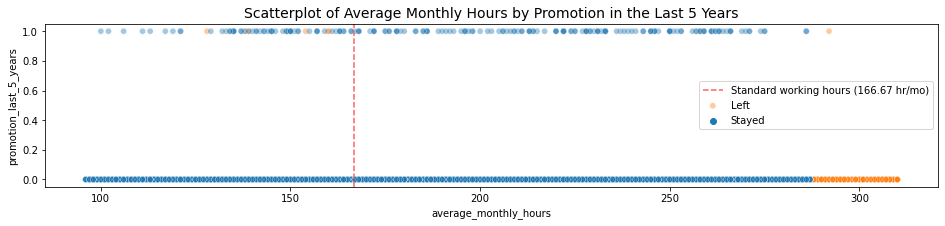

In [ ]:
plt.figure(figsize = (16, 3))
plt.title('Scatterplot of Average Monthly Hours by Promotion in the Last 5 Years', fontsize = '14')

sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'promotion_last_5_years', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', ls = '--')
plt.legend(labels = ['Standard working hours (166.67 hr/mo)', 'Left', 'Stayed'])

plt.show()

Several observations were made based off the scatterplot above:

> **1.** Very few employees who were promoted in the last 5 years left.

> **2.** Very few employees who worked the most hours were promoted.

> **3.** Most of the employees who left worked the longest hours.

**Table 2.** The following table displays the distribution of employees across departments.

In [ ]:
df['department'].value_counts().rename_axis('department').reset_index(name = 'count')

,department,count
0,sales,3239
1,technical,2244
2,support,1821
3,IT,976
4,RandD,694
5,product_mng,686
6,marketing,673
7,accounting,621
8,hr,601
9,management,436


**Plot 10.** The following histogram displays the distribution of employees who stayed vs. employees who left based on department.

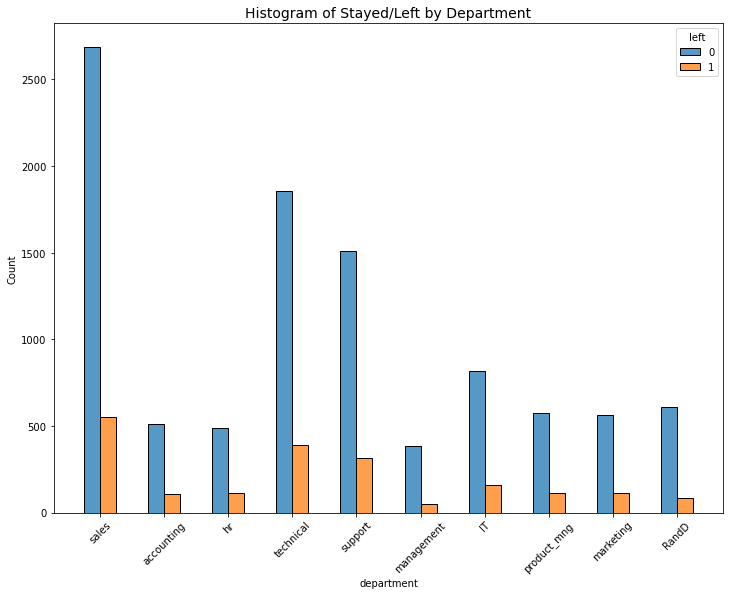

In [ ]:
plt.figure(figsize = (12, 9))
plt.title('Histogram of Stayed/Left by Department', fontsize = '14')

sns.histplot(data = df, x = 'department', hue = 'left', discrete = 1, hue_order = [0, 1], multiple = 'dodge', shrink = 0.5)
plt.xticks(rotation = '45')

plt.show()

The distribution of employees who stayed vs. employees who left seems to be consistent across all departments.

**Plot 11.** The following heatmap displays correlations between variables in the data.

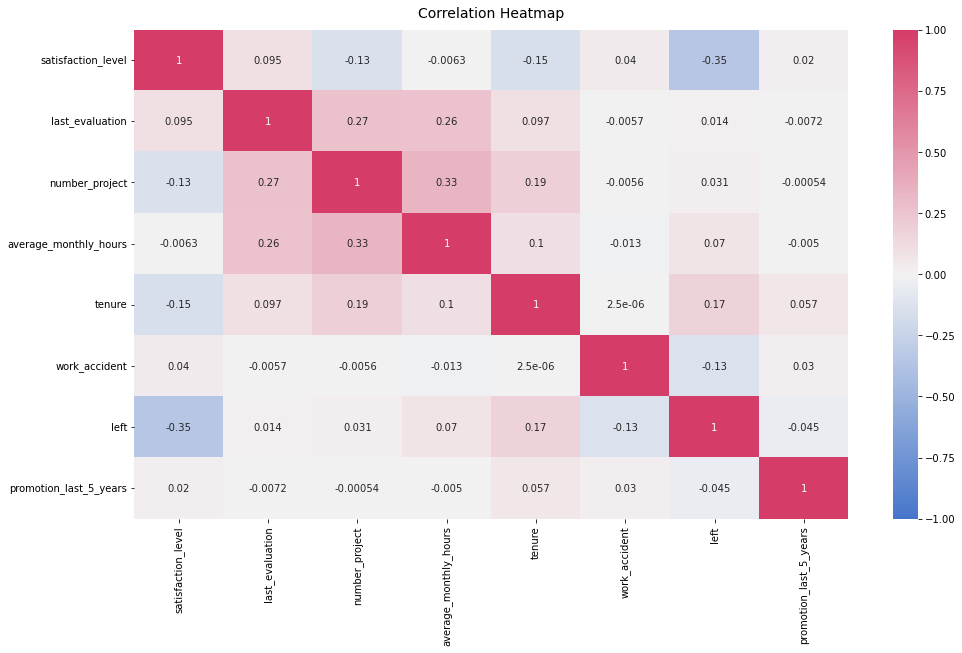

In [ ]:
plt.figure(figsize = (16, 9))

heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.diverging_palette(255, 1, as_cmap = True))
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 14}, pad = 12)

plt.show()

The heatmap confirms a positive correlation between the number of projects, average monthly hours, and evaluation scores. Additionally, it confirms the negative correlation between whether an employee leaves and their satisfaction level.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well the model fits the data


## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

## Model 1: Logistic Regression

### Feature Selection

Non-numeric variables are easier to handle if encoded. The variables `department` and `salary` are thus encoded.

The variable `department` will undergoes dummy encoding.

The variable `salary` is ordinal and undergoes level encoding (0-2).

In [ ]:
# Copy the dataframe

df_enc = df.copy()

# Level encode the `salary` column

df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Dummy encode the `department` column

df_enc = pd.get_dummies(df_enc, drop_first = False)

# Display first few rows of the dataframe

df_enc.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


**Plot 12.** The following heatmap displays correlations between variables in the updated dataframe.

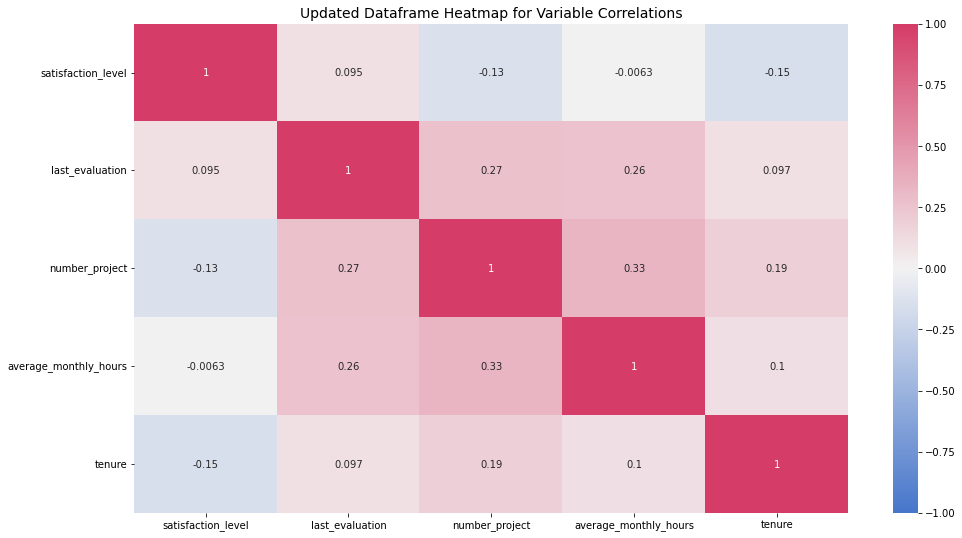

In [ ]:
plt.figure(figsize = (16, 9))
plt.title('Updated Dataframe Heatmap for Variable Correlations', fontsize = '14')

sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.diverging_palette(255, 1, as_cmap = True))

plt.show()

Logistic regression is sensitive to outliers, so outliers in the `tenure` column identified earlier are removed.

In [ ]:
# New dataframe without outliers in the `tenure` column

df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe

df_logreg.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5_years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,0.45,0.54,2,135,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


The outcome variable, `y`, must be isolated from the dataframe.

In [ ]:
y = df_logreg['left']

The `left` column is dropped from the dataframe and assigned to the features variable `X`.

In [ ]:
X = df_logreg.drop('left', axis = 1)

The data is split into the training and testing sets (0.80-0.20 train:test ratio). Stratification with values from `y` is required due to class imbalance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

The logistic regression model is first fit to the training data.

In [ ]:
log_clf = LogisticRegression(random_state = 0, max_iter = 500).fit(X_train, y_train)

The logistic regression model is next fit to the test data, and predictions on the test set are saved in the variable `y_pred`.

In [ ]:
y_pred = log_clf.predict(X_test)

**Plot 13.** The following confusion matrix displays the results of the logistic regression model.

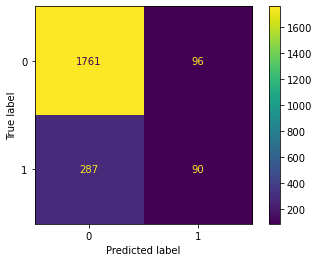

In [ ]:
# Values for confusion matrix

log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

# Display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)

# Confusion matrix
log_disp.plot(values_format = '')

plt.show()

The class balance is evaluated.

In [ ]:
df_logreg['left'].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is approximately an 83.15%-16.85% split.

The following report provides metrics to evaluate the logistic regression model.

In [ ]:
target_names = ['Predicted stayed', 'Predicted left']
print(classification_report(y_test, y_pred, target_names = target_names))

                  precision    recall  f1-score   support

Predicted stayed       0.86      0.95      0.90      1857
  Predicted left       0.48      0.24      0.32       377

        accuracy                           0.83      2234
       macro avg       0.67      0.59      0.61      2234
    weighted avg       0.80      0.83      0.80      2234



The logistic regression model had weighted average metrics with a precision of 80%, recall of 83%, and f1-score of 80%. Overall accuracy was 83%. Predicting employees who left had significantly lower scores.

## Model 2: Tree-Based Model

As done previously, the outcome variable `y` is isolated from the dataframe.

In [ ]:
y = df_enc['left']

The left column is again dropped from the dataframe and assigned to the features variable `X`.

In [ ]:
X = df_enc.drop('left', axis = 1)

The data is split into the training and testing sets (0.80-0.20 train:test ratio). Stratification with values from `y` is required due to class imbalance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

#### Decision Tree Part 1

A decision tree model is constructed and a cross-validated grid-search is set up.

In [ ]:
# Model instantiation

tree = DecisionTreeClassifier(random_state = 0)

# Dictionary of hyperparameters to search over

cv_params = {'max_depth':[4, 6, 8, None], 'min_samples_leaf': [2, 5, 1], 'min_samples_split': [2, 4, 6]}

# Dictionary of scoring metrics to capture

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch

tree1 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

The decision tree is first fit to the training data.

In [ ]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 4.03 s, sys: 3.74 ms, total: 4.03 s
Wall time: 4.1 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

Optimal decision tree parameters are identified.

In [ ]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

The best AUC score achieved by the decision tree model on the training set is identified.

In [ ]:
tree1.best_score_

0.9710911037253271

Based on this score, the model appears to predict employees who are leaving very well.

The following function streamlines the process of extracting scores from the grid search.

In [ ]:
def make_results(model_name: str, model_object, metric: str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

     # Dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc', 'precision': 'mean_test_precision', 'recall': 'mean_test_recall', 'f1': 'mean_test_f1', 'accuracy': 'mean_test_accuracy'}

    # Results from the CV and in dataframe
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name], 'precision': [precision], 'recall': [recall], 'F1': [f1], 'accuracy': [accuracy], 'auc': [auc]})

    return table

The function is called on the grid search.

In [ ]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')

tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.926282,0.917764,0.921857,0.974145,0.971091


While the metrics show that the decision tree has very good performance, a single decision tree is likely to overfit. A random forest regression model will prevent overfitting.

#### Random Forest Part 1

A random forest model is constructed and a cross-validated grid-search is set up.

In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state = 0)

# Dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 'max_features': [1.0], 'max_samples': [0.7, 1.0], 'min_samples_leaf': [1,2,3], 'min_samples_split': [2,3,4], 'n_estimators': [300, 500],}

# Dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

The random forest model is fit to the training data.

In [ ]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 12min 18s, sys: 2.26 s, total: 12min 20s
Wall time: 12min 26s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

Path specified to save the model.

In [ ]:
path = '/home/jovyan/work/'

Functions to pickle the model and read in the model.

In [ ]:
def write_pickle(path, model_object, save_as: str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [ ]:
def read_pickle(path, saved_model_name: str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

The model is saved in a pickle file and read in.

In [ ]:
write_pickle(path, rf1, 'hr_rf1')

In [ ]:
rf1 = read_pickle(path, 'hr_rf1')

The optimal values for the parameters of the random forest model are identified.

In [ ]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

The best AUC score achieved by the random forest model on the training set is identified.

In [ ]:
rf1.best_score_

0.9793947236268321

The evaluation scores on the training set for the decision tree and random forest models are collected.

In [ ]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.926282  0.917764  0.921857  0.974145  0.971091
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.949339  0.914625  0.931569   0.97769  0.979395


The evaluation scores of the random forest model are higher in all metrics than the decision tree, except for recall, a negligble difference of ~0.003.

Function to get all the scores from a model's predictions.

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name], 'precision': [precision], 'recall': [recall], 'f1': [f1], 'accuracy': [accuracy], 'AUC': [auc]})

    return table

The random forest model is used on the test set.

In [ ]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.958005,0.917085,0.937099,0.979575,0.954545


The model is strong; both test scores and validation scores are similar and of high magnitude.

#### Feature Engineering

To prevent data leakage, the `average_monthly_hours` column will be transformed into a binary variable encoding whether an employee is overworked. The threshold will be set at 175 working hours per month. Additionally, the `satisfaction_level` column will be dropped as it is not a useful feature in this model.

In [ ]:
# Drop `satisfaction_level` column and assign to new dataframe

df2 = df_enc.drop('satisfaction_level', axis = 1)

In [ ]:
# Instantiation of `overworked` column

df2['overworked'] = df2['average_monthly_hours']

# Define `overworked` as working > 175 hrs/week

df2['overworked'] = (df2['overworked'] > 175).astype(int)

The original `average_monthly_hours` column is dropped.

In [ ]:
df2 = df2.drop('average_monthly_hours', axis=1)

Features and target variables are isolated.

In [ ]:
y = df2['left']

X = df2.drop('left', axis = 1)

The data is split into the training and testing sets (0.80-0.20 train:test ratio). Stratification with values from `y` is required due to class imbalance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

#### Decision Tree Part 2

In [ ]:
# Model instantiation

tree = DecisionTreeClassifier(random_state = 0)

# Dictionary of hyperparameters to search over

cv_params = {'max_depth':[4, 6, 8, None], 'min_samples_leaf': [2, 5, 1], 'min_samples_split': [2, 4, 6]}

# Dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearch instantiation

tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

The second decision tree model is fit to the training data.

In [ ]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 3.14 s, sys: 1.14 ms, total: 3.14 s
Wall time: 3.17 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

Optimal decision tree parameters are identified.

In [ ]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

The best AUC score achieved by the decision tree model on the training set is identified.

In [ ]:
tree2.best_score_

0.9593274693440157

All other CV scores are checked.

In [ ]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.926282  0.917764  0.921857  0.974145  0.971091
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.824575  0.902711  0.861388  0.951731  0.959327


As expected, some scores dropped due to the dropping of more features.

#### Random Forest Part 2

In [ ]:
# Model instantiation

rf = RandomForestClassifier(random_state = 0)

# Dictionary of hyperparameters to search over

cv_params = {'max_depth': [3,5, None], 'max_features': [1.0], 'max_samples': [0.7, 1.0], 'min_samples_leaf': [1,2,3], 'min_samples_split': [2,3,4], 'n_estimators': [300, 500],}

# Dictionary of scoring metrics to capture

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearch instantiation

rf2 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

The second random forest model is fit to the training data.

In [ ]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 9min 28s, sys: 1.94 s, total: 9min 30s
Wall time: 9min 33s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

The model is saved in a pickle file and read in.

In [ ]:
write_pickle(path, rf2, 'hr_rf2')

In [ ]:
rf2 = read_pickle(path, 'hr_rf2')

The optimal values for the parameters of the second random forest model are identified.

In [ ]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

The best AUC score achieved by the second random forest model on the training set is identified.

In [ ]:
rf2.best_score_

0.9640511882941997

The evaluation scores on the training set for the second decision tree and random forest models are collected.

In [ ]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.824575  0.902711  0.861388  0.951731  0.959327
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.863791  0.902698  0.882784  0.960175  0.964051


As expected, most metrics dropped. However, AUC increased.

The second random forest model is used on the test set.

In [ ]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.857143,0.904523,0.880196,0.95915,0.937269


This final model appears to perform very well.

**Plot 14.** The following confusion matrix displays the results of the final random forest model.

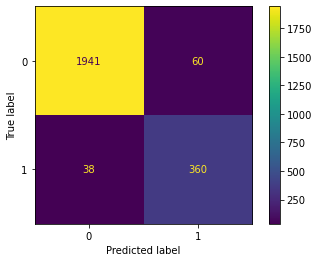

In [ ]:
# Array of values for confusion matrix

preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

# Confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf2.classes_)
disp.plot(values_format = '');

While the model predicts more false positives than false negatives, overall the model is very strong.

#### Decision tree splits

**Plot 15.** The following diagram outlines the splits of the decision tree model and the most important features identified by the random forest model.

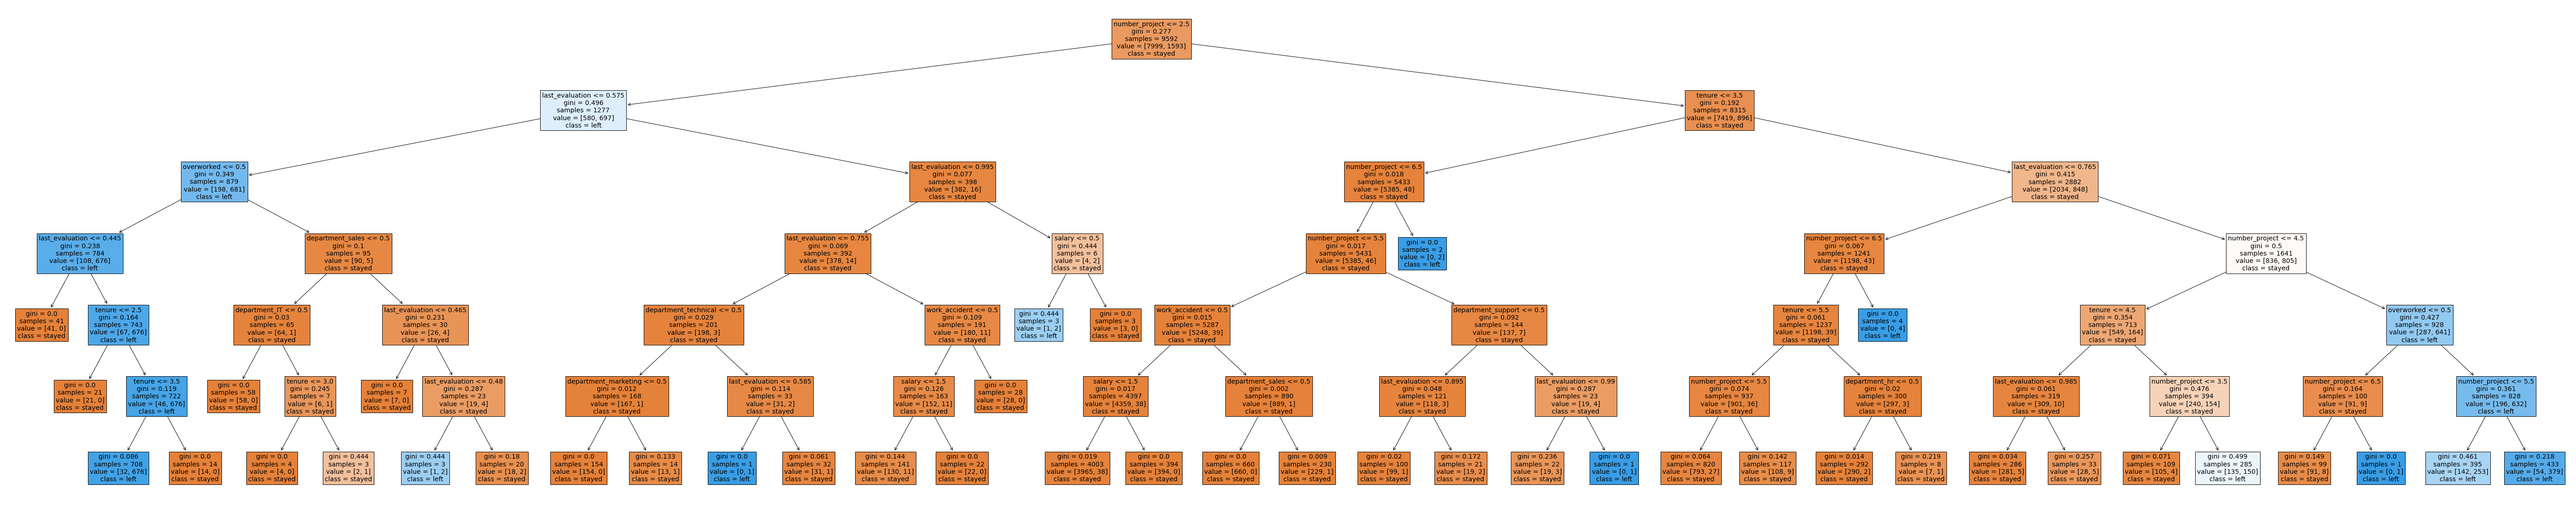

In [ ]:
plt.figure(figsize = (100,20))

plot_tree(tree2.best_estimator_, max_depth = 6, fontsize = 14, feature_names = X.columns, class_names={0: 'stayed', 1: 'left'}, filled = True)

plt.show()

*Note: Double-clicking on the image allows for zooming in.*

#### Decision Tree Feature Importance

**Table 3.** The following table displays features and their relative gini importances as identified by the decision trees.

In [ ]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns = ['gini_importance'], index = X.columns)
tree2_importances = tree2_importances.sort_values(by = 'gini_importance', ascending = False)

# Features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.345247
last_evaluation,0.340673
tenure,0.213109
overworked,0.098842
salary,0.000839
department_support,0.000443
department_sales,0.000297
work_accident,0.000155
department_IT,0.000131
department_hr,0.000112


**Plot 16.** The following barplot visualizes the table shown above.

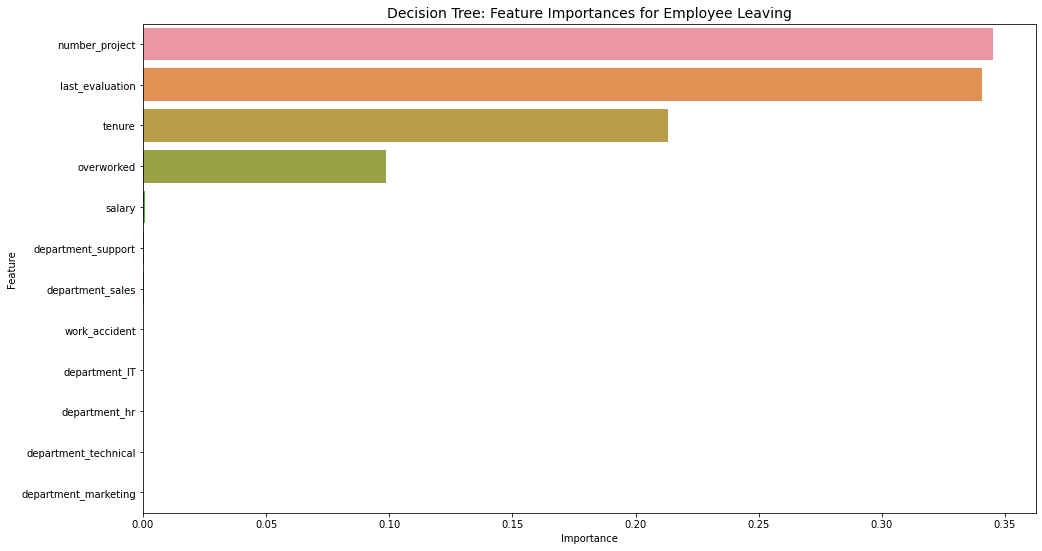

In [ ]:
plt.figure(figsize = (16, 9))

plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize = 14)

sns.barplot(data = tree2_importances, x = "gini_importance", y = tree2_importances.index, orient = 'h')

plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The features `number_project` and `last_evaluation` appear to have been identified as the most important features in this model. The features `tenure` and `overworked` also appear to have some effect.

#### Random Forest Feature Importance

**Plot 17.** The following plot displays features identified as important by the random forest model.

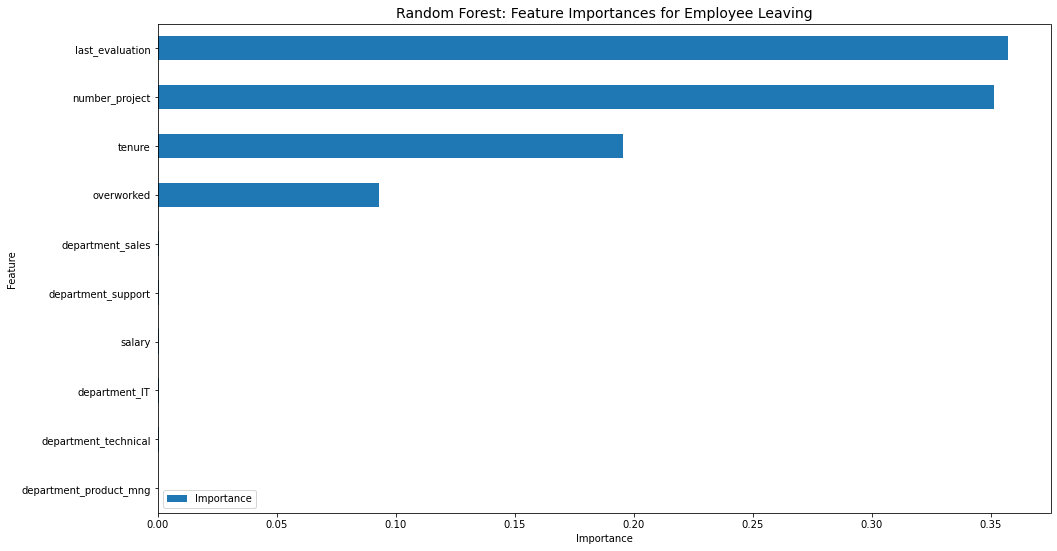

In [ ]:
# Feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10: ]

# Column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

# Plot

fig = plt.figure(figsize = (16, 9))

y_df = pd.DataFrame({"Feature": feat,"Importance": feat_impt})
y_sort_df = y_df.sort_values("Importance")

ax1 = fig.add_subplot(111)

y_sort_df.plot(kind = 'barh', ax = ax1, x = "Feature", y = "Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize = 14)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Similarly to the feature importance results from the decision tree model, the random forest model also identified `last_evaluation`, `number_project`, `tenure`, and `overworked` as the four most important features in predicting `left`.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression Model**

The logistic regression model achieved weighted average metrics of precision 80%, recall 83%, and f1-score 80% with an accuracy of 83% on the test set.

**Tree-Based Model**

The final random forest model achieved metrics of precision 86%, recall 90%, f1-score 88%, and AUC 94% with an accuracy of 96%.

### Conclusion, Recommendations, Next Steps

All models created confirm that employees at the company are overworked.

To maintain employee retention, the company is recommended to follow these suggestions:

> Impose a cap on the number of projects on which an individual can work.

> Conduct an investigation on the reasons for high dissatisfaction in four-year workers.

> Remove longer-hour requirements or reward employees extra for working longer hours.

> Communicate with employees all work policies, and allow for converse communication to understand employees' perspectives.

> Objectify evaluation scores and make clear the metrics used to generate them.

**Model Improvements**

Dropping some subjective features such as evaluation or satisfaction scores that are not measured with standardized metrics may help address any further data leakage. The frequency of evaluation or satisfaction surveys may also be useful context for the model and whether those features should be retained.

**Model Suggestions**

An unsupervised machine learning model, such as a K-means clustering model, may provide further insights into factors leading to employees leaving.